In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

C:\Users\duanf\AppData\Local\Temp\ipykernel_132024\1323157142.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [22]:
df = pd.read_csv("./btc_data/BTC_DATA.csv").drop(columns = ["Unnamed: 0"])
df.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2612.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4047.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
3,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0
4,2010/07/22,0.0649,221,491.903,412,181.543,1.705481e+09,334641.0,2570.0,0.000000,...,49.814,0.0,0.0,0.0,0.0,-24.455,0.0,0.0,0.0,0.0


In [7]:
df.interpolate(axis=0,inplace=True)

In [12]:
interval1 = (df['Date'] >= '2013/04/01') & (df['Date'] <= '2016/04/01')
interval2=(df['Date'] >= '2013/04/01') & (df['Date'] <= '2017/04/01')
interval3=(df['Date'] >= '2013/04/01') & (df['Date'] <= '2019/12/31')

In [13]:
os.makedirs("./btc_data_new",exist_ok=True)

In [15]:
one=df['priceUSD'].shift(-1,fill_value=1)
seven=df['priceUSD'].shift(-7,fill_value=1)
fourteen=df['priceUSD'].shift(-14,fill_value=1)
thirty=df['priceUSD'].shift(-30,fill_value=1)
sixty=df['priceUSD'].shift(-60,fill_value=1)
ninety=df['priceUSD'].shift(-90,fill_value=1)

In [39]:
df=df.loc[interval1]

In [40]:
X_raw=df.iloc[:,2:17]

In [41]:
X.shape,y.shape

((4389, 16), (4389,))

In [42]:
y=df.iloc[:,1:2]
y=np.ravel(y)


In [46]:
features_list=[]
technical_indicators=['sma','ema','wma','trx','mom','std','var','rsi','roc']
periods=['3','7','14','30','90']
for i in technical_indicators:
    for j in periods:
        string=str(j)+str(i)
        X=df.filter(like=string,axis=1)
        X=SimpleImputer(missing_values=0,strategy='most_frequent').fit_transform(X)
        X=pd.DataFrame(X)
        X.columns=df.filter(like=string,axis=1).columns
        rf1=RandomForestRegressor(random_state=7,n_jobs=-1)
        rfecv=SequentialFeatureSelector(rf1,
                                        n_features_to_select=2,
                                        scoring='neg_mean_absolute_error',
                                        n_jobs=-1)
        rfecv.fit(X,y)
        if True:
            rf1.fit(X,y)
            maximp=rf1.feature_importances_.max()
            for x in range(len(rf1.feature_importances_)):
                if maximp==rf1.feature_importances_[x]:
                    new_features = X.columns[x]
        else:
            mask = rfecv.get_support()
            new_features = X.columns[mask]
        features_list.append(str(new_features))
        print(string+': '+new_features)


3sma: price3smaUSD
7sma: price7smaUSD
14sma: price14smaUSD
30sma: transactionvalue30smaUSD
90sma: mediantransactionvalue90smaUSD
3ema: price3emaUSD
7ema: price7emaUSD
14ema: price14emaUSD
30ema: transactionvalue30emaUSD
90ema: transactionvalue90emaUSD
3wma: price3wmaUSD
7wma: price7wmaUSD
14wma: price14wmaUSD
30wma: price30wmaUSD
90wma: transactionvalue90wmaUSD
3trx: difficulty3trx
7trx: difficulty7trx
14trx: difficulty14trx
30trx: fee_to_reward30trxUSD
90trx: fee_to_reward90trxUSD
3mom: mining_profitability3mom
7mom: hashrate7mom
14mom: difficulty14mom
30mom: difficulty30mom
90mom: price90momUSD
3std: hashrate3std
7std: mining_profitability7std
14std: transactionvalue14stdUSD
30std: sentinusd30stdUSD
90std: sentinusd90stdUSD
3var: hashrate3var
7var: mining_profitability7var
14var: transactionvalue14varUSD
30var: sentinusd30varUSD
90var: sentinusd90varUSD
3rsi: price3rsiUSD
7rsi: mining_profitability7rsi
14rsi: mining_profitability14rsi
30rsi: difficulty30rsi
90rsi: difficulty90rsi
3ro

In [51]:
final = df[features_list].reset_index(drop=True)
final.head()

,price3smaUSD,price7smaUSD,price14smaUSD,transactionvalue30smaUSD,mediantransactionvalue90smaUSD,price3emaUSD,price7emaUSD,price14emaUSD,transactionvalue30emaUSD,transactionvalue90emaUSD,...,price3rsiUSD,mining_profitability7rsi,mining_profitability14rsi,difficulty30rsi,difficulty90rsi,transactionfees3rocUSD,difficulty7roc,difficulty14roc,difficulty30roc,difficulty90roc
0,90.406,84.929,73.635,1883.0,26.683,90.961,84.752,75.294,2019.0,1335.0,...,99.456,64.030,61.336,97.889,91.841,-8.219,0.000,38.125,53.297,124.720
1,97.171,90.078,77.661,2012.0,27.577,99.355,90.501,79.621,2172.0,1403.0,...,99.811,70.829,65.333,97.889,91.841,10.080,0.000,38.125,53.297,124.720
2,107.489,95.902,82.108,2144.0,28.497,109.679,97.877,85.006,2321.0,1470.0,...,99.902,76.602,69.172,97.889,91.841,42.924,0.000,38.125,53.297,124.720
3,117.104,101.303,86.363,2244.0,29.741,116.620,104.298,90.146,2446.0,1531.0,...,99.919,75.100,68.465,97.889,91.841,81.728,0.000,38.125,53.297,124.720
4,124.076,107.314,90.858,2341.0,30.977,122.642,110.389,95.282,2568.0,1593.0,...,99.941,81.686,73.118,98.186,92.508,15.109,4.618,44.504,60.377,135.098


In [55]:
final.to_csv("./btc_data_new/reg_interval1.csv",
             index = True)

In [56]:
X  = final.values
X.shape

(1097, 45)

In [58]:
rf = RandomForestRegressor(random_state=42).fit(X,y)

In [59]:
rf

RandomForestRegressor(random_state=42)

In [61]:
feature_importance = rf.feature_importances_
feature_importance /= feature_importance.sum()
feature_importance

array([2.53709729e-02, 7.92005186e-03, 5.43906598e-03, 3.88595668e-05,
       5.98952943e-05, 2.66826175e-01, 5.78255155e-03, 6.13206875e-03,
       3.88534892e-05, 3.48071709e-05, 6.51971039e-01, 6.21640258e-03,
       4.02109706e-03, 4.12031213e-03, 2.17010853e-05, 3.03675146e-05,
       3.74822011e-05, 7.54586825e-05, 3.20133717e-05, 4.14963770e-05,
       5.48215226e-05, 3.83302977e-05, 1.63285209e-05, 2.60207348e-05,
       1.42104772e-02, 1.81588460e-04, 3.18579819e-05, 2.06854086e-05,
       3.61869650e-05, 3.49084439e-05, 1.52655534e-04, 3.25777507e-05,
       3.92859480e-05, 4.32327905e-05, 3.39214364e-05, 4.13164228e-04,
       7.34463950e-05, 1.10874145e-04, 2.15215585e-06, 8.66014980e-06,
       7.17028373e-05, 1.87726433e-05, 3.34489983e-05, 4.80581851e-05,
       5.61701199e-05])

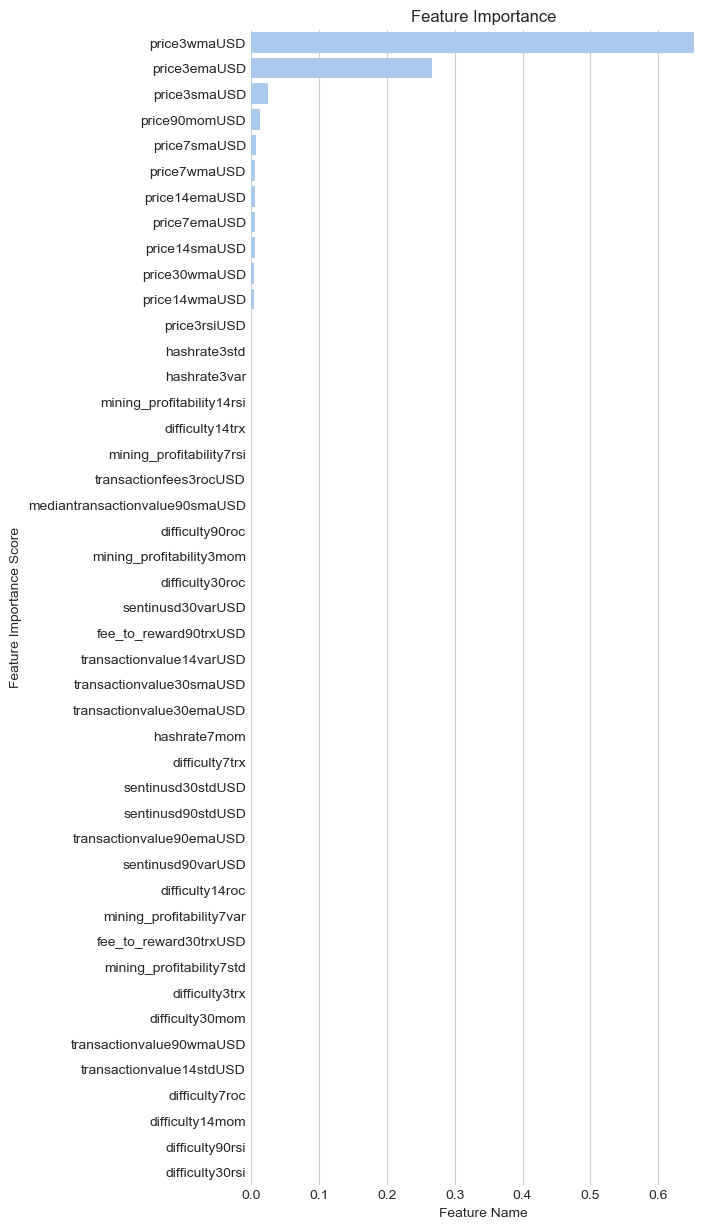

In [68]:
f, ax = plt.subplots(figsize=(6, 15))

importance = pd.DataFrame(
    {
        "name" : features_list,
        "importance" : feature_importance
    }
).sort_values(by = "importance",ascending=False)
sns.set_color_codes("pastel")
sns.barplot(y="name", x="importance", 
            data=importance,
            color="b",orient = 'h')

ax.set(ylabel="Feature Importance Score",
       xlabel="Feature Name",title="Feature Importance")
sns.despine(left=True, bottom=True)